In [236]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import curve_fit
import csv

# 2GHz modulation 3054MSPS

In [314]:
with open('../data/Peakdata_2GHz.pkl','rb') as file:
    peak= pickle.load(file)

In [315]:
def makehist(ch,string,bin,A,mu):
    
    data = np.concatenate(peak[ch][string])
    hist, bin_edges = np.histogram(data, bins=bin)
    
    # ヒストグラムの中心点を計算
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # ガウシアンフィット用の関数（正規分布関数）
    def gaussian(x, A, mu, sigma):
        return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    
    # フィットの初期値を設定
    initial_guess = [A, mu, 20]  # A, mu, sigma
    
    # ガウシアンフィットを実行
    params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)

    A,mu, sigma = params
    # フィット結果をプロット
    plt.bar(bin_centers, hist, width=bin_centers[1] - bin_centers[0], color='b', label='Histogram')
    plt.plot(bin_centers, gaussian(bin_centers, *params), 'r-', label='Fit: mu={:.2f}, sigma={:.2f}'.format(mu, abs(sigma)))
    legend=plt.legend()
    legend.get_frame().set_alpha(0.5)
    plt.xlabel('Peak Value')
    # フィット結果のパラメータを表示
    print(f"Amplitude (A): {params[0]}")
    print(f"Mean (mu): {params[1]}")
    print(f"Standard Deviation (sigma): {params[2]}")
    
    # プロットを表示
    plt.show()


# compare poscac simulink and data

In [359]:
a=peak[0]['15000'][0]
b=peak[0]['10000'][0]
c=peak[0]['5000'][0]
d=peak[0]['20000'][0]

In [360]:
with open('../data/simdata_poscalc.csv','w') as file:
    for row in zip(a,b,c,d):
        file.write(','.join(map(str,row))+'\n')

In [415]:
with open('out_x.csv','r') as file:
    reader=csv.reader(file)
    xdata=[float(row[0]) for row in reader]

with open('out_y.csv','r') as file:
    reader=csv.reader(file)
    ydata=[float(row[0]) for row in reader]

with open('out_charge.csv','r') as file:
    reader=csv.reader(file)
    chargedata=[float(row[0]) for row in reader]

In [416]:
h=(a-b-c+d)/(a+b+c+d)
v=(a+b-c-d)/(a+b+c+d)

coeffX=[-1.92E-07,9.17E-01,-3.51E-16, 9.73E-10, -6.18E-12,-2.74E-11,1.30E-04,-7.72E-19,-3.81E-04,2.18E-18]
coeffY=[9.41E-08,3.49E-16,9.45E-01,1.52E-09,1.22E-12,-1.53E-09,-3.34E-18,-3.56E-04,2.41E-18,1.32E-04]

x = coeffX[0] + \
coeffX[1] * h    + coeffX[2] * v + \
coeffX[3] * h**2 + coeffX[4] * h * v + coeffX[5] * v**2 
y = coeffY[0] + \
coeffY[1] * h    + coeffY[2] * v + \
coeffY[3] * h**2 + coeffY[4] * h * v + coeffY[5] * v**2 

charge=a+b+c+d

In [417]:
print(xdata[0:20])
print(ydata[0:20])
print(chargedata[0:20])

[nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.34534, 0.33784, 0.34802, 0.34249, 0.34123, 0.34885, 0.34867, 0.3365, 0.33867, 0.35155, 0.35021]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.0021058, 0.0010363, -0.0018257, 0.0031189, 0.0013152, 9.432e-08, -0.0039254, -0.0047144, 0.0028629, 0.0049918, -0.0094974]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 7180.0, 7296.0, 7246.0, 7272.0, 7186.0, 7276.0, 7222.0, 7216.0, 7262.0, 7194.0, 7164.0]


In [418]:
print(x[0:20])
print(y[0:20])
print(charge[0:20])

[0.34534354 0.33784191 0.34801941 0.34248771 0.34122692 0.34885302
 0.34866804 0.33650424 0.33866602 0.35155472 0.35021086 0.34381123
 0.34708154 0.34283876 0.33749803 0.34488919 0.35066951 0.34378078
 0.33882013 0.34777491]
[-2.10575527e-03  1.03627852e-03 -1.82574062e-03  3.11890619e-03
  1.31515137e-03  9.43199838e-08 -3.92541108e-03 -4.71442898e-03
  2.86294201e-03  4.99175404e-03 -9.49739312e-03 -2.09641151e-03
 -1.03674317e-02 -7.50606838e-03 -2.33068125e-03 -2.61329064e-03
 -3.38700245e-03  2.58502845e-04  7.76593897e-04 -3.92106751e-03]
[7180 7296 7246 7272 7186 7276 7222 7216 7262 7194 7164 7212 7292 7302
 7298 7232 7254 7314 7302 7230]


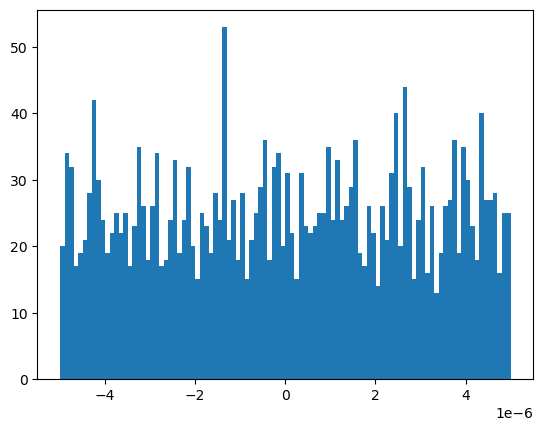

In [411]:
plt.hist(np.array(xdata[9:])-x[:len(ydata)-9],bins=100)
plt.show()

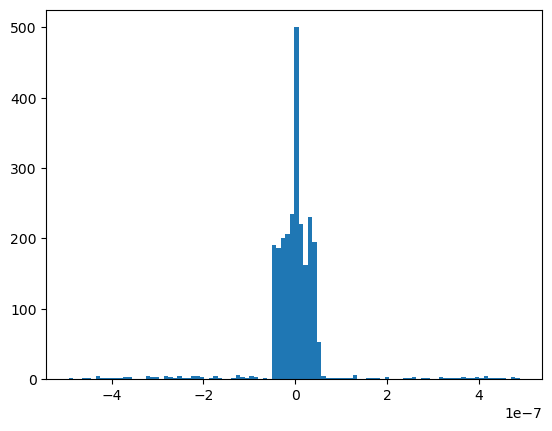

In [412]:
plt.hist(np.array(ydata[9:])-y[:len(ydata)-9],bins=100)
plt.show()

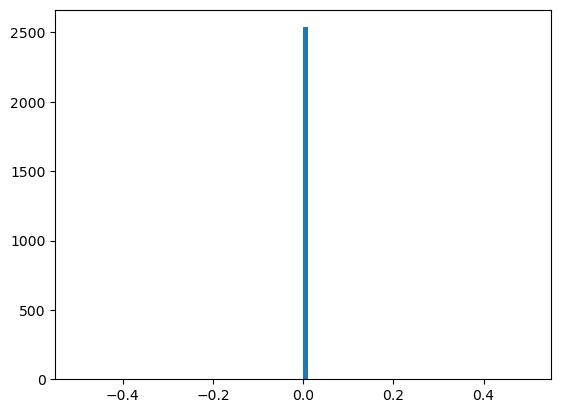

In [414]:
plt.hist(np.array(chargedata[9:])-charge[:len(chargedata)-9],bins=100)
plt.show()

# end

Amplitude (A): 1846.9016203724893
Mean (mu): 2079.108327144359
Standard Deviation (sigma): -23.15931578874083


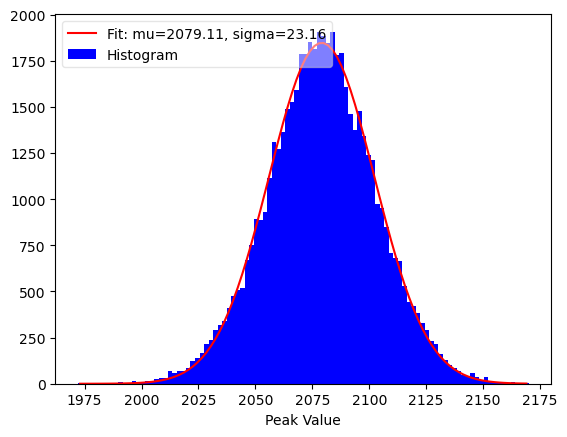

In [316]:
makehist(2,'15000',100,4000,2000)

In [317]:
def analysis(data):
    mean=np.mean(data)
    stdv=np.std(data)
    data=data[(data>mean-7*stdv) & (data<mean+7*stdv)]
    
    mean=np.mean(data)
    stdv=np.std(data)
    max_value = np.max(data)
    scaled_data = data / max_value
    rms = max_value*np.sqrt(np.mean(scaled_data ** 2))
    return mean, rms, stdv

In [318]:
mean=[]
rms=[]
std=[]
for i in range(4):
    m=[]
    r=[]
    s=[]
    for j in range(32):
        string=str((j+1)*1000)
        m.append(analysis(np.concatenate(peak[i][string][1:]))[0])
        r.append(analysis(np.concatenate(peak[i][string][1:]))[1])
        s.append(analysis(np.concatenate(peak[i][string][1:]))[2])
    mean.append(m)
    rms.append(r)
    std.append(s)

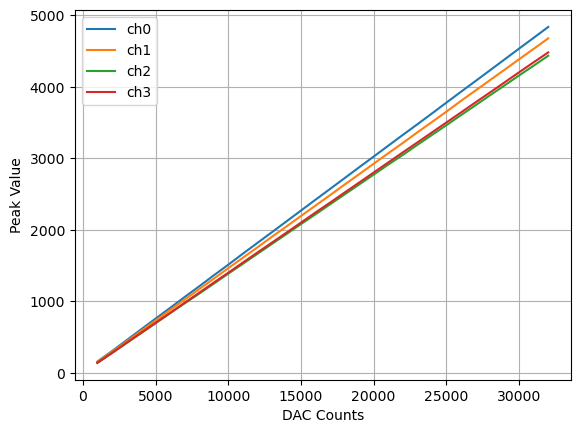

In [31]:
x=np.arange(1,33)*1000
plt.plot(x,mean[0],label='ch0')
plt.plot(x,mean[1],label='ch1')
plt.plot(x,mean[2],label='ch2')
plt.plot(x,mean[3],label='ch3')
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak Value')
#plt.savefig('mean.png',dpi=150)
plt.show()

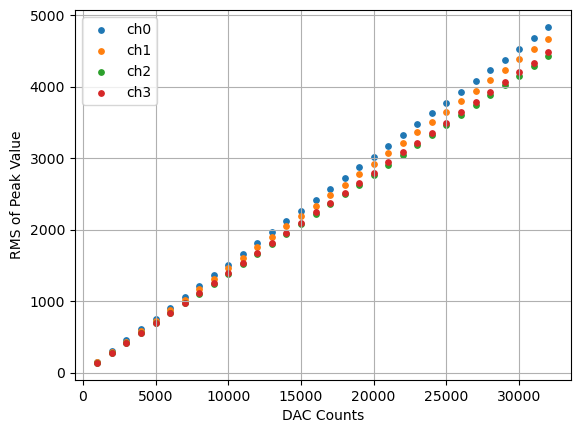

In [16]:
x=np.arange(1,33)*1000
plt.scatter(x,rms[0],label='ch0',s=15)
plt.scatter(x,rms[1],label='ch1',s=15)
plt.scatter(x,rms[2],label='ch2',s=15)
plt.scatter(x,rms[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('RMS of Peak Value')
#plt.savefig('rms.png',dpi=150)
plt.show()

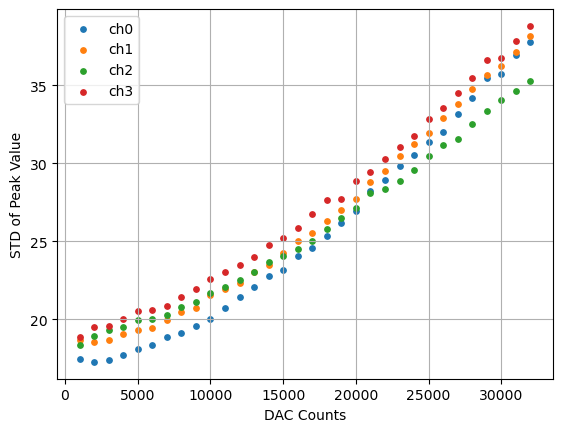

In [32]:
x=np.arange(1,33)*1000
plt.scatter(x,std[0],label='ch0',s=15)
plt.scatter(x,std[1],label='ch1',s=15)
plt.scatter(x,std[2],label='ch2',s=15)
plt.scatter(x,std[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('STD of Peak Value')
#plt.savefig('std.png',dpi=150)
plt.show()

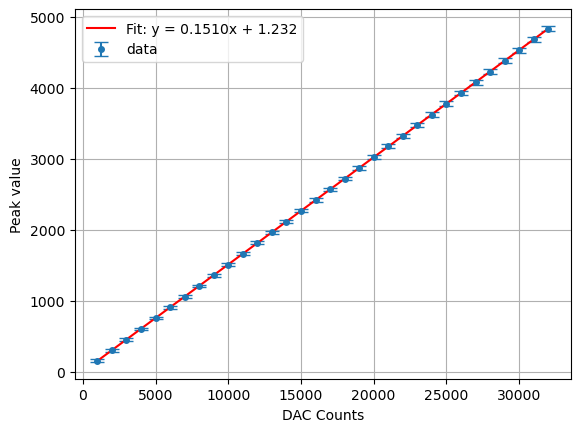

In [79]:
y=mean[0]
y_err=std[0]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch0.png',dpi=150)
plt.show()

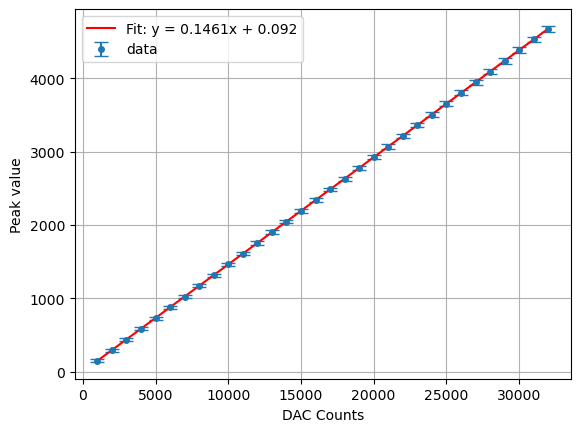

In [80]:
y=mean[1]
y_err=std[1]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch1.png',dpi=150)
plt.show()

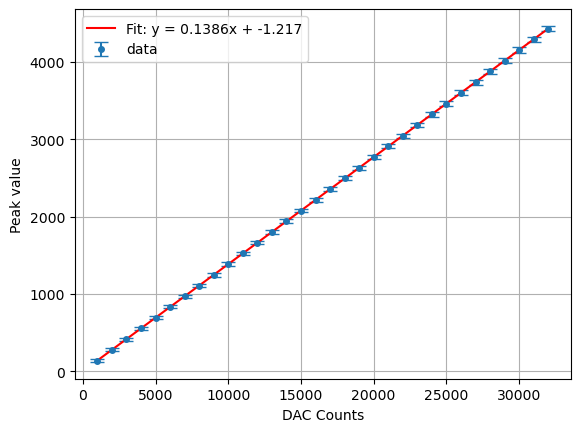

In [81]:
y=mean[2]
y_err=std[2]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch2.png',dpi=150)
plt.show()

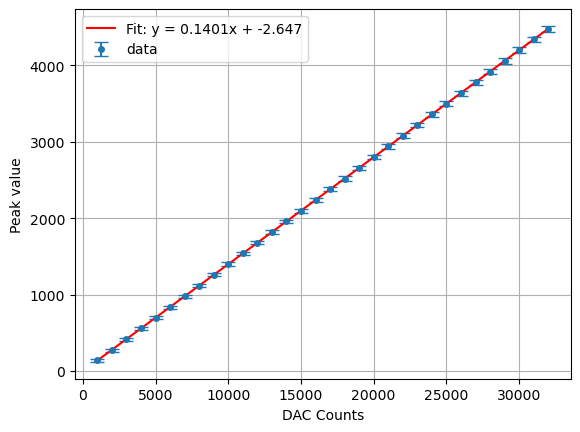

In [82]:
y=mean[3]
y_err=std[3]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch3.png',dpi=150)
plt.show()

# 1GHz modulation 3054MSPS

In [150]:
with open('../data/Peakdata_1GHz_3054MSPS.pkl','rb') as file:
    peak= pickle.load(file)

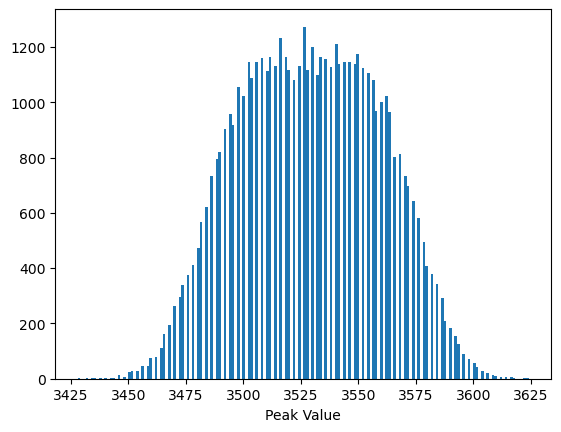

In [151]:
plt.hist(np.concatenate(peak[0]['23000']),bins=170)
plt.xlabel('Peak Value')
plt.show()

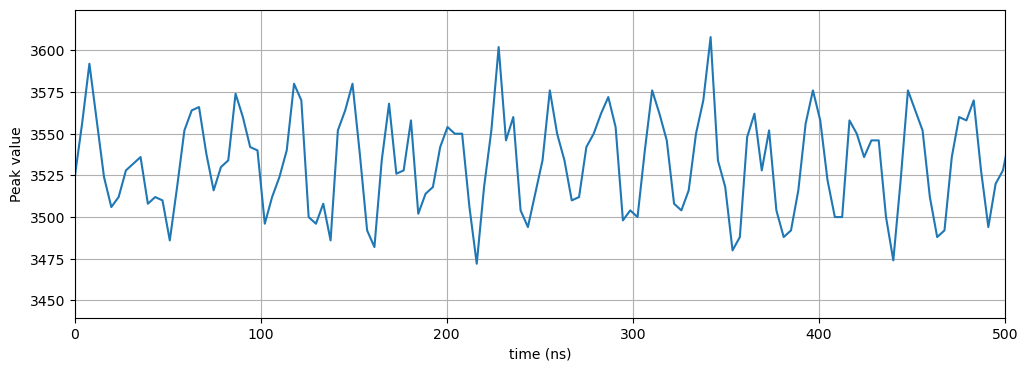

In [147]:
x=np.arange(len(peak[0]['23000'][0]))*1000/254.5
plt.figure(figsize=(12,4))
plt.plot(x,peak[0]['23000'][0])
plt.grid()
plt.xlabel('time (ns)')
plt.ylabel('Peak value')
plt.xlim(0,500)
plt.show()

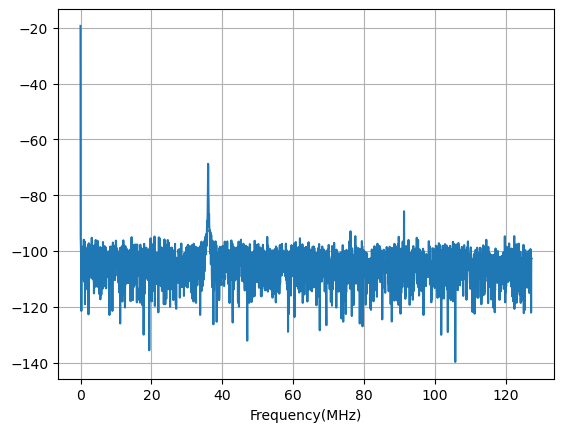

In [148]:
#FFT
waveform=peak[0]['23000'][0]
size    = len(waveform) # Number of data points in the file
timeBin = 1000/254.5 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:30000],mag[0:30000])
plt.xlabel("Frequency(MHz)")

plt.grid()

In [156]:
mean=[]
rms=[]
std=[]
for i in range(4):
    m=[]
    r=[]
    s=[]
    for j in range(32):
        string=str((j+1)*1000)
        m.append(analysis(np.concatenate(peak[i][string]))[0])
        r.append(analysis(np.concatenate(peak[i][string]))[1])
        s.append(analysis(np.concatenate(peak[i][string]))[2])
    mean.append(m)
    rms.append(r)
    std.append(s)

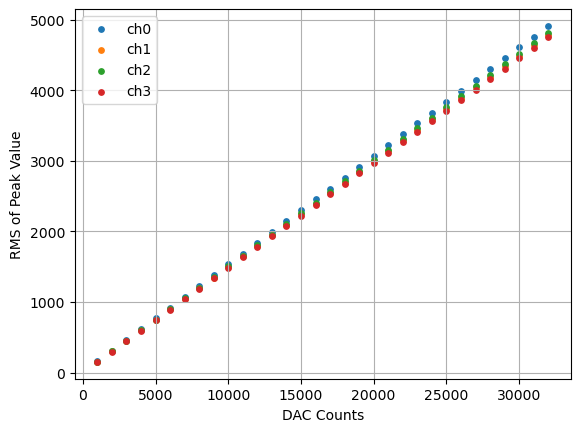

In [157]:
x=np.arange(1,33)*1000
plt.scatter(x,rms[0],label='ch0',s=15)
plt.scatter(x,rms[1],label='ch1',s=15)
plt.scatter(x,rms[2],label='ch2',s=15)
plt.scatter(x,rms[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('RMS of Peak Value')
#plt.savefig('rms.png',dpi=150)
plt.show()

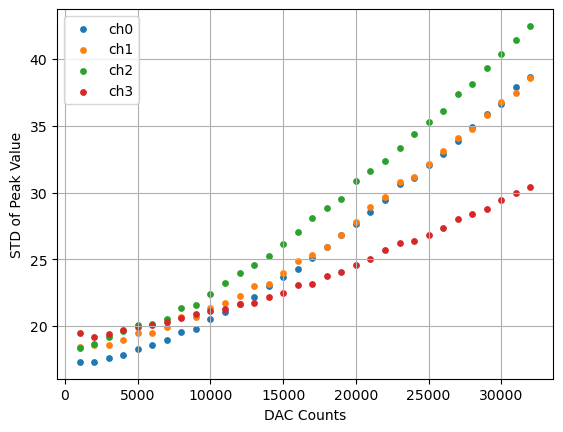

In [158]:
x=np.arange(1,33)*1000
plt.scatter(x,std[0],label='ch0',s=15)
plt.scatter(x,std[1],label='ch1',s=15)
plt.scatter(x,std[2],label='ch2',s=15)
plt.scatter(x,std[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('STD of Peak Value')
#plt.savefig('std.png',dpi=150)
plt.show()

# 1GHz modulation 4072MSPS

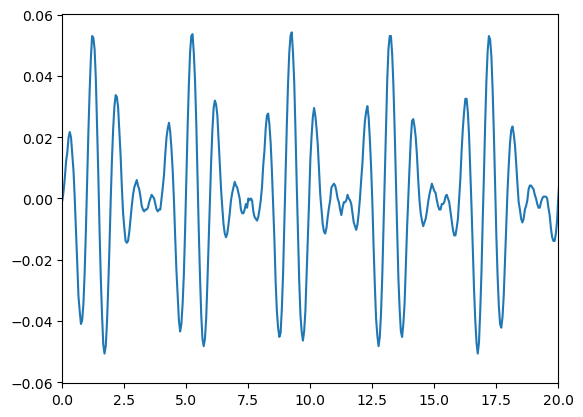

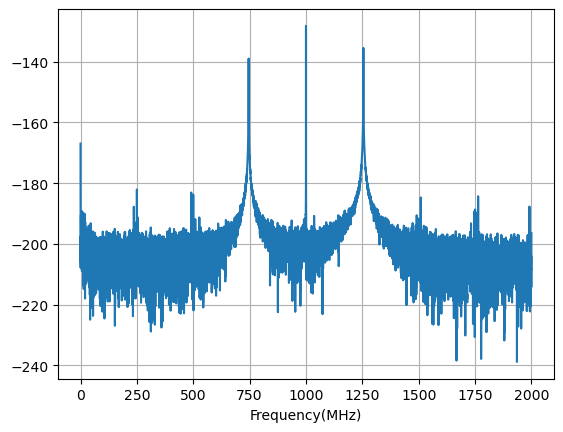

In [250]:
path = '../data/modulation/scope_1GHz_4nsspacing.csv'
waveform = []

with open(path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for i, row in enumerate(reader):
        waveform.append(float(row[1]))
t=np.arange(0,len(waveform))*1000/20000
plt.plot(t,waveform)
plt.xlim(0,20)
plt.show()

size    = len(waveform) # Number of data points in the file
timeBin = 1000/20000 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:10000],mag[0:10000])
plt.xlabel("Frequency(MHz)")

plt.grid()

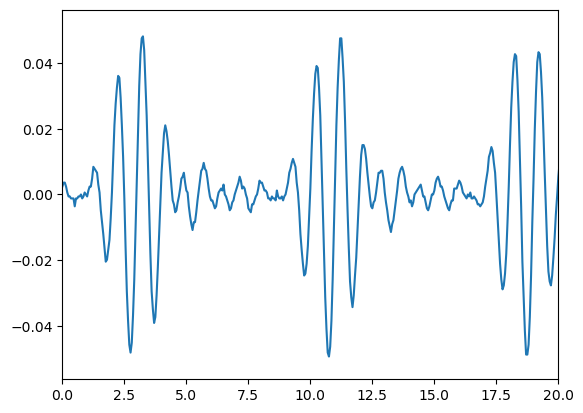

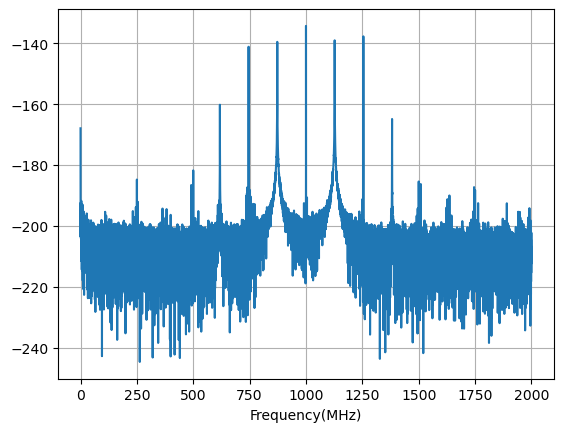

In [249]:
path = '../data/modulation/scope_1GHz_8nsspacing.csv'
waveform = []

with open(path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for i, row in enumerate(reader):
        waveform.append(float(row[1]))
t=np.arange(0,len(waveform))*1000/20000
plt.plot(t,waveform)
plt.xlim(0,20)
plt.show()

size    = len(waveform) # Number of data points in the file
timeBin = 1000/20000 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:20000],mag[0:20000])
plt.xlabel("Frequency(MHz)")

plt.grid()

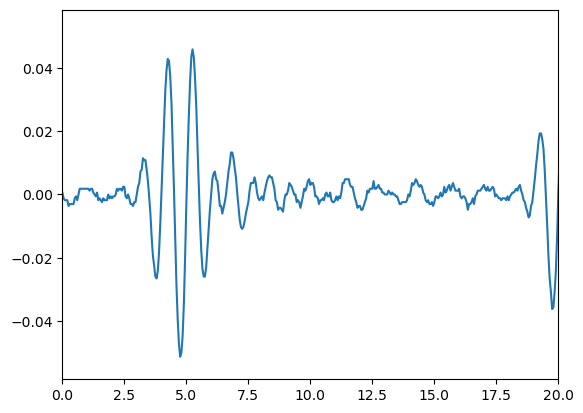

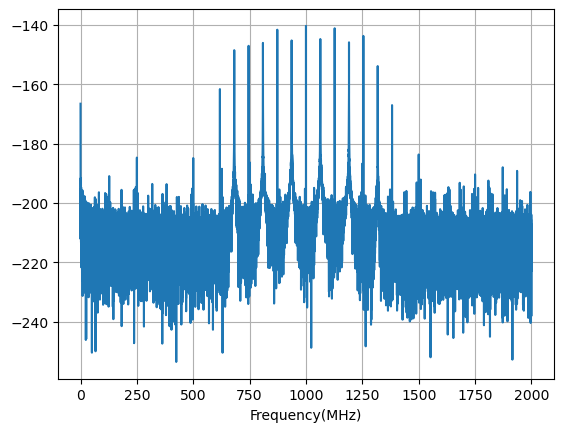

In [271]:
path = '../data/modulation/scope_1GHz_16nsspacing.csv'
waveform = []

with open(path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for i, row in enumerate(reader):
        waveform.append(float(row[1]))
t=np.arange(0,len(waveform))*1000/20000
plt.plot(t,waveform)
plt.xlim(0,20)
plt.show()

size    = len(waveform) # Number of data points in the file
timeBin = 1000/20000 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:40000],mag[0:40000])
plt.xlabel("Frequency(MHz)")

plt.grid()

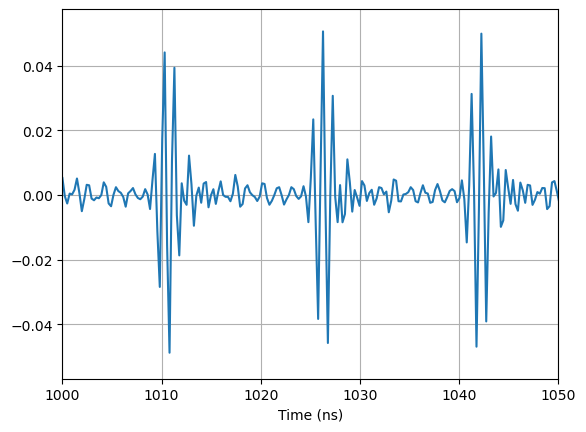

In [272]:
newTimeBin = 1.0/(0.509*8.0) # Unit of ns for 3.054 GSPS
newSize    = 25000

newTimeSteps = np.linspace(0, newTimeBin*(newSize-1), num=newSize)

newWaveform = np.interp(newTimeSteps, t, waveform)
# Plot the time waveform (RFSoC rate)
plt.plot(newTimeSteps,newWaveform)
plt.xlabel("Time (ns)")
plt.xlim(1000,1050)
plt.grid()

In [274]:
path = '../data/simulink_1GHz_4072MSPS_16space_oscope.csv'
with open(path, 'w') as f:
    for smpl in newWaveform:
        f.write(f'{smpl}\n')

In [307]:
with open('../data/Peakdata_1GHz_4072MSPS_16nsspacing.pkl','rb') as file:
    peak= pickle.load(file)

In [308]:
mean=[]
rms=[]
std=[]
for i in range(4):
    m=[]
    r=[]
    s=[]
    for j in range(8):
        string=str((j+1)*4000)
        m.append(analysis(np.concatenate(peak[i][string]))[0])
        r.append(analysis(np.concatenate(peak[i][string]))[1])
        s.append(analysis(np.concatenate(peak[i][string]))[2])
    mean.append(m)
    rms.append(r)
    std.append(s)

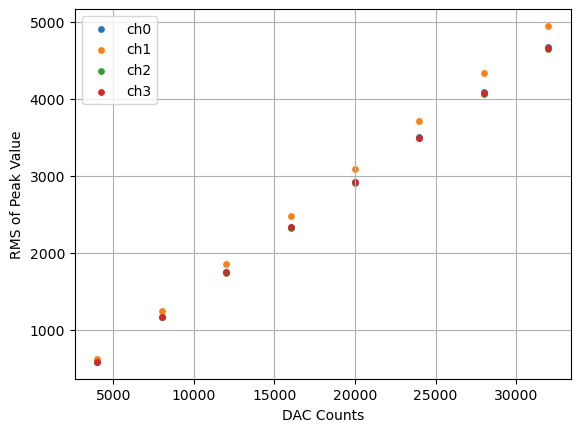

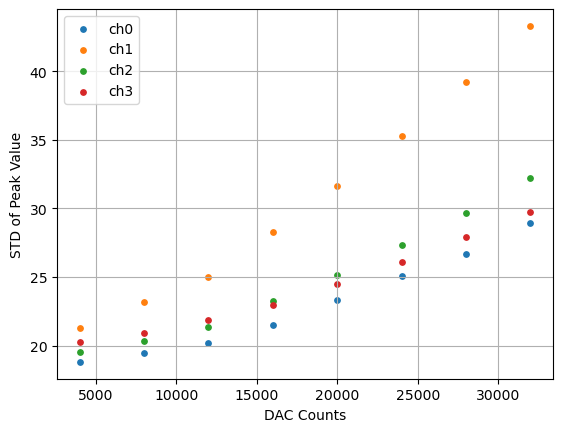

In [309]:
x=np.arange(1,9)*4000
plt.scatter(x,rms[0],label='ch0',s=15)
plt.scatter(x,rms[1],label='ch1',s=15)
plt.scatter(x,rms[2],label='ch2',s=15)
plt.scatter(x,rms[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('RMS of Peak Value')
#plt.savefig('rms.png',dpi=150)
plt.show()

plt.scatter(x,std[0],label='ch0',s=15)
plt.scatter(x,std[1],label='ch1',s=15)
plt.scatter(x,std[2],label='ch2',s=15)
plt.scatter(x,std[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('STD of Peak Value')
#plt.savefig('std.png',dpi=150)
plt.show()

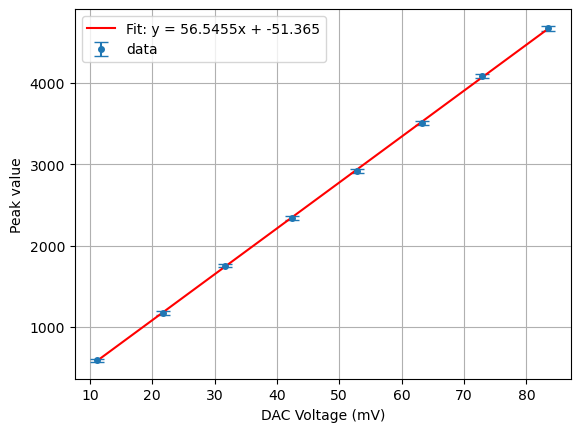

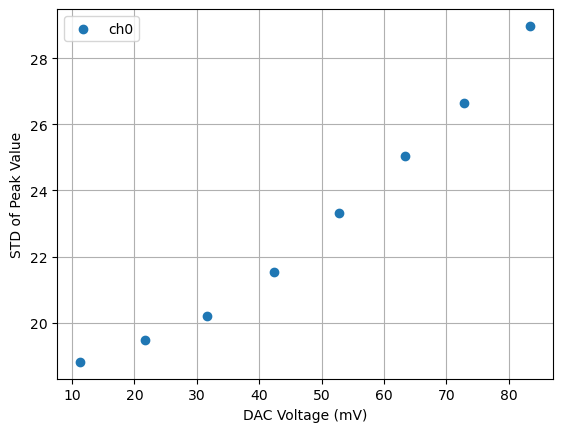

In [258]:
# ONLY CH0 with volage
x=np.array([11.2,21.7,31.6,42.4,52.8,63.3,72.8,83.5])
y=mean[0]
y_err=std[0]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Voltage (mV)')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch0.png',dpi=150)
plt.show()

plt.scatter(x,std[0],label='ch0')
plt.grid()
plt.legend()
plt.xlabel('DAC Voltage (mV)')
plt.ylabel('STD of Peak Value')
#plt.savefig('std.png',dpi=150)
plt.show()

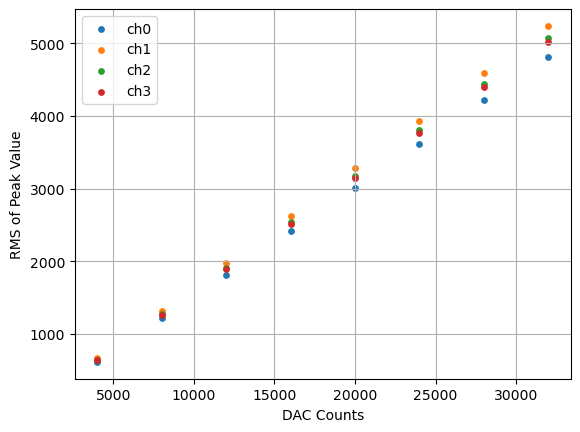

In [259]:
#4ns
with open('../data/Peakdata_1GHz_4072MSPS_4nsspacing.pkl','rb') as file:
    peak= pickle.load(file)

mean=[]
rms=[]
std=[]
for i in range(4):
    m=[]
    r=[]
    s=[]
    for j in range(8):
        string=str((j+1)*4000)
        m.append(analysis(np.concatenate(peak[i][string]))[0])
        r.append(analysis(np.concatenate(peak[i][string]))[1])
        s.append(analysis(np.concatenate(peak[i][string]))[2])
    mean.append(m)
    rms.append(r)
    std.append(s)

x=np.arange(1,9)*4000
plt.scatter(x,rms[0],label='ch0',s=15)
plt.scatter(x,rms[1],label='ch1',s=15)
plt.scatter(x,rms[2],label='ch2',s=15)
plt.scatter(x,rms[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('RMS of Peak Value')
#plt.savefig('rms.png',dpi=150)
plt.show()

# 500MHz modulation (4072MSPS)

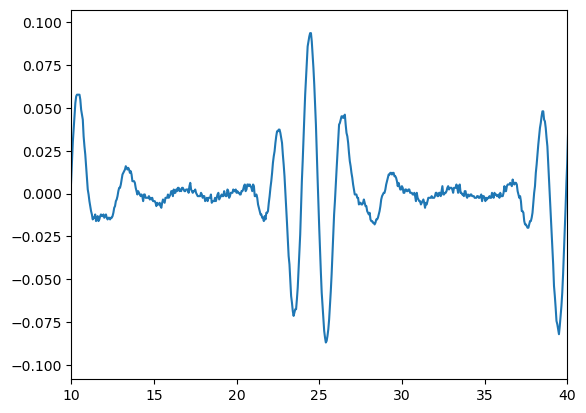

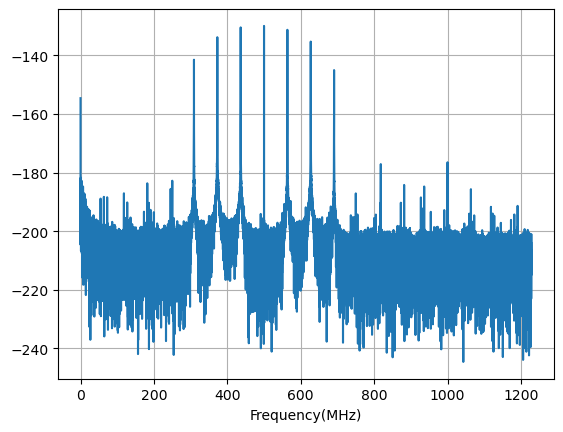

In [301]:
path = '../data/modulation/scope_500MHz_16nsspacing_powerup.csv'
waveform = []

with open(path) as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quoting=csv.QUOTE_NONE)
    for i, row in enumerate(reader):
        waveform.append(float(row[1]))
t=np.arange(0,len(waveform))*1000/20000
plt.plot(t,waveform)
plt.xlim(10,40)
plt.show()

size    = len(waveform) # Number of data points in the file
timeBin = 1000/20000 # Unit of ns
freqBin = (0.5E+3/timeBin)/float(size//2) # Units of MHz
freqSteps = np.linspace(0, freqBin*(size//2-1), num=size//2)
freq = np.fft.fft(waveform)/float(size)
freq = freq[range(size//2)]
mag = 20.0*np.log10(np.abs(freq)/32767.0) # Units of dBFS

plt.plot(freqSteps[0:43000],mag[0:43000])
plt.xlabel("Frequency(MHz)")

plt.grid()

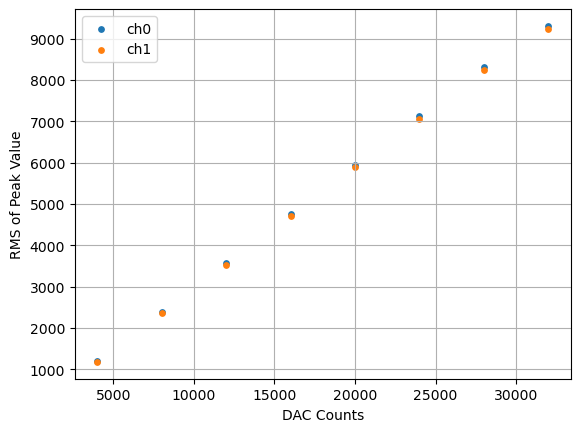

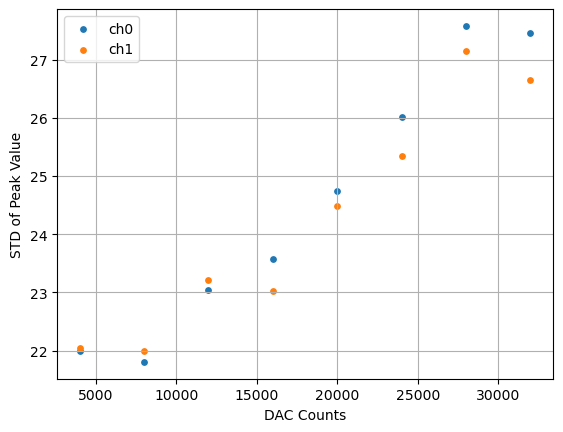

In [312]:
with open('../data/Peakdata_500MHz_4072MSPS_16nsspacing.pkl','rb') as file:
    peak= pickle.load(file)

mean=[]
rms=[]
std=[]
for i in range(2):
    m=[]
    r=[]
    s=[]
    for j in range(8):
        string=str((j+1)*4000)
        m.append(analysis(np.concatenate(peak[i][string]))[0])
        r.append(analysis(np.concatenate(peak[i][string]))[1])
        s.append(analysis(np.concatenate(peak[i][string]))[2])
    mean.append(m)
    rms.append(r)
    std.append(s)

x=np.arange(1,9)*4000
plt.scatter(x,rms[0],label='ch0',s=15)
plt.scatter(x,rms[1],label='ch1',s=15)
#plt.scatter(x,rms[2],label='ch2',s=15)
#plt.scatter(x,rms[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('RMS of Peak Value')
#plt.savefig('rms.png',dpi=150)
plt.show()
plt.scatter(x,std[0],label='ch0',s=15)
plt.scatter(x,std[1],label='ch1',s=15)
#plt.scatter(x,std[2],label='ch2',s=15)
#plt.scatter(x,std[3],label='ch3',s=15)
plt.grid()
plt.legend()
plt.xlabel('DAC Counts')
plt.ylabel('STD of Peak Value')
#plt.savefig('std.png',dpi=150)
plt.show()

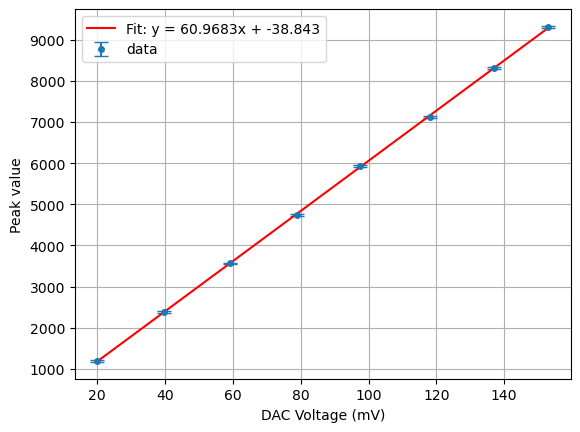

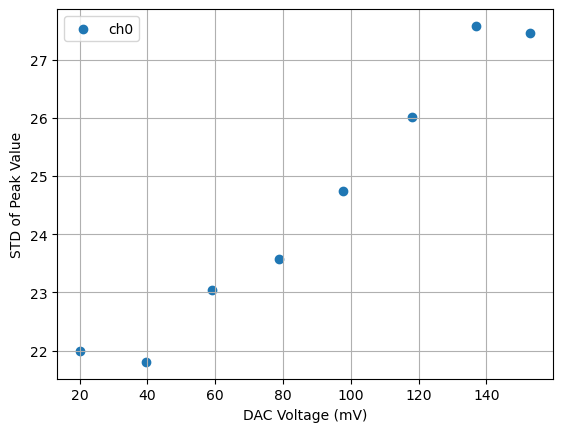

In [313]:
# ONLY CH0 with volage
x=np.array([20,39.6,59.1,78.9,97.6,118,137,153])
y=mean[0]
y_err=std[0]

def linear_model(x, a, b):
    return a * x + b

params, covariance = curve_fit(linear_model, x, y, sigma=y_err)

a, b = params

plt.errorbar(x, y, yerr=y_err, capsize=5,fmt='o', label='data',markersize=4)
plt.plot(x, linear_model(x, a, b), label=f'Fit: y = {a:.4f}x + {b:.3f}', color='red')
plt.legend()
plt.xlabel('DAC Voltage (mV)')
plt.ylabel('Peak value')
plt.grid()
#plt.savefig('ch0.png',dpi=150)
plt.show()

plt.scatter(x,std[0],label='ch0')
plt.grid()
plt.legend()
plt.xlabel('DAC Voltage (mV)')
plt.ylabel('STD of Peak Value')
#plt.savefig('std.png',dpi=150)
plt.show()